In [187]:
import requests
import json
from bs4 import BeautifulSoup
import csv

In [188]:
# to get value from nested field
def get_data_by_nested_field_name(item_data, item_name):
    if item_data[item_name] != None:
            return item_data[item_name]['name']
    return None

In [189]:
# to get value from flat field
def get_data_by_flat_field(item_data, item_name):
    if item_data[item_name] != None:
            return item_data[item_name]
    return None

In [190]:
# to get data of item in list page
def get_item(data):
    i = json.loads(json.dumps(data))
    item = {}
    item['id'] = get_data_by_flat_field(i, 'id')
    item['category'] = get_data_by_nested_field_name(i,'category')
    item['make'] = get_data_by_nested_field_name(i,'make')
    item['model'] = get_data_by_nested_field_name(i,'model')
    item['badge'] = get_data_by_nested_field_name(i,'badge')
    item['transmissions'] = get_data_by_nested_field_name(i,'transmissions')
    item['bodystyle'] = get_data_by_nested_field_name(i,'bodystyle')
    item['fuel_type'] = get_data_by_nested_field_name(i,'fuel_type')
    item['description'] = get_data_by_flat_field(i,'description')
    item['country'] = get_data_by_flat_field(i,'country')
    item['state'] = get_data_by_flat_field(i,'state')
    item['city'] = get_data_by_flat_field(i,'city')
    item['slug'] = get_data_by_flat_field(i,'slug')
    item['price'] = get_data_by_flat_field(i,'price')
    item['odometer'] = get_data_by_flat_field(i,'odometer')
    return item

In [191]:
# to get more data from page detail
def get_item_detail(data, item):
    item['latitude'] = get_data_by_flat_field(data,'latitude')
    item['longitude'] = get_data_by_flat_field(data,'longitude')
    item['year_build'] = get_data_by_flat_field(data,'year_build')
    item['seats'] = get_data_by_flat_field(data,'seats')
    item['doors'] = get_data_by_flat_field(data,'doors')
    item['gears'] = get_data_by_flat_field(data,'gears')
    item['turbo'] = get_data_by_flat_field(data,'turbo')
    item['phone'] = get_data_by_flat_field(data,'phone')
    item['engine_capacity'] = get_data_by_flat_field(data,'engine_capacity')
    item['plate_number'] = get_data_by_flat_field(data,'plate_number')
    item['drive_types'] = get_data_by_nested_field_name(data,'drive_types')
    item['vehicle_lifestyle'] = get_data_by_nested_field_name(data,'vehicle_lifestyle')
    item['interior_color'] = get_data_by_nested_field_name(data,'interior_color')
    item['exterior_color'] = get_data_by_nested_field_name(data,'exterior_color')
    return item

In [192]:
# item or list page request
def request_item(page_url):
    response = requests.get(page_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    items = soup.findChildren('vehicle-component')
    data = items[0].attrs[':vehicles']
    return json.loads(data)

In [193]:
# detail page request
def request_item_detail(page_url):
    response = requests.get(page_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    items = soup.findChildren('vehicle-report-ad-component')
    data = items[0].attrs[':vehicle']
    return json.loads(data)

In [8]:

# loop throw to all page in list
base_url = 'https://carmarketkh.com'
item_url = str.format('{}/vehicles?page=', base_url)
contents = []
page = 1
while(True):
    page_url = str.format('{}{}', item_url, page)
    json_data = request_item(page_url)
    if(len(json_data['data']) == 0):
        break
    for item in json_data['data']:
        data = get_item(item)
        contents.append(data)
    print('page :\t',page, ',\tsize :\t', len(json_data['data']))
    page = page + 1

page :	 1 ,	size :	 10
page :	 2 ,	size :	 10
page :	 3 ,	size :	 10
page :	 4 ,	size :	 10
page :	 5 ,	size :	 10
page :	 6 ,	size :	 10
page :	 7 ,	size :	 10
page :	 8 ,	size :	 10
page :	 9 ,	size :	 10
page :	 10 ,	size :	 10
page :	 11 ,	size :	 10
page :	 12 ,	size :	 10
page :	 13 ,	size :	 10
page :	 14 ,	size :	 10
page :	 15 ,	size :	 10
page :	 16 ,	size :	 10
page :	 17 ,	size :	 10
page :	 18 ,	size :	 10
page :	 19 ,	size :	 10
page :	 20 ,	size :	 10
page :	 21 ,	size :	 10
page :	 22 ,	size :	 10
page :	 23 ,	size :	 10
page :	 24 ,	size :	 10
page :	 25 ,	size :	 10
page :	 26 ,	size :	 10
page :	 27 ,	size :	 10
page :	 28 ,	size :	 10
page :	 29 ,	size :	 10
page :	 30 ,	size :	 10
page :	 31 ,	size :	 10
page :	 32 ,	size :	 10
page :	 33 ,	size :	 10
page :	 34 ,	size :	 10
page :	 35 ,	size :	 10
page :	 36 ,	size :	 10
page :	 37 ,	size :	 10
page :	 38 ,	size :	 10
page :	 39 ,	size :	 10
page :	 40 ,	size :	 10
page :	 41 ,	size :	 10
page :	 42 ,	size :	 10
p

IndexError: list index out of range

In [9]:
len(contents)

1820

In [10]:
# row header
header = ['id','category', 'make', 'model','badge','transmissions','bodystyle','fuel_type','description','country','state','city']
with open('car-item-data.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)
    # write the data
    for item in contents:
        data = [item['id'],item['category'],item['make'],item['model'],item['badge'],item['transmissions'],item['bodystyle'],item['fuel_type'],item['description'],item['country'],item['state'],item['city']]
        writer.writerow(data)


In [12]:
# loop throw more into page detail for more data
for i in contents:
    item_detail_url = str.format('{}/vehicle/{}', base_url, i['slug'])
    item_detail_data = request_item_detail(item_detail_url)
    get_item_detail(item_detail_data, i)

In [13]:
# row header
header = ['id','category', 'make', 'model','badge','transmissions','bodystyle','fuel_type','description','country','state','city','latitude','longitude','price','odometer','year_build','seats','doors','gears','turbo','phone','engine_capacity','plate_number','drive_types','vehicle_lifestyle','interior_color','exterior_color']
with open('car-item-detail-data.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)
    # write the data
    for item in contents:
        data = [item['id'],item['category'],item['make'],item['model'],item['badge'],item['transmissions'],item['bodystyle'],item['fuel_type'],item['description'],item['country'],item['state'],item['city'],item['latitude'],item['longitude'],item['price'],item['odometer'],item['year_build'],item['seats'],item['doors'],item['gears'],item['turbo'],item['phone'],item['engine_capacity'],item['plate_number'],item['drive_types'],item['vehicle_lifestyle'],item['interior_color'],item['exterior_color']]
        writer.writerow(data)


In [26]:
#*** DEA ***
#Understanding the structure of the data

*** Field Definition ***

In [248]:
import pandas as pd
import numpy as np

In [266]:
df=pd.read_csv('car-item-detail-data.csv')

In [267]:
df.head()

,id,category,make,model,badge,transmissions,bodystyle,fuel_type,description,country,...,doors,gears,turbo,phone,engine_capacity,plate_number,drive_types,vehicle_lifestyle,interior_color,exterior_color
0,8583,Used,Lexus,NX,200t F Sport,Automatic,SUV,Petrol,ទំនាក់ទំនងឬតេឡេក្រាមទាំង4ប្រព័ន្ធ : 089333766 ...,Cambodia,...,4,1,0,85333664,2000,NaN,Front Wheel Drive,Family,Cherry,White
1,8580,Used,Toyota,Prius,Option 4,Automatic,Hatchback,Petrol,ទំនាក់ទំនង : 089333766 085333665 069677741 098...,Cambodia,...,4,1,0,85333664,1800,NaN,Front Wheel Drive,Family,Yellow,Gold
2,8579,Used,Toyota,Highlander,V6,Automatic,SUV,Petrol,ទំនាក់ទំនងឬតេឡេក្រាមទាំង4ប្រព័ន្ធ : 089333766 ...,Cambodia,...,4,1,0,85333664,3000,NaN,Front Wheel Drive,Family,Yellow,Silver
3,9205,Used,Lexus,RX,300,Automatic,SUV,Petrol,Rx300 f sport 2019 full option 78500ចចារ\r\n06...,Cambodia,...,4,6,1,85333665,3200,12345.0,Front Wheel Drive,Family,Cherry,Black
4,9204,Used,Toyota,Prius,NaN,Manual,Sedan,Petrol,prius 06 hf \r\n10800$\r\n069677741-089333766-...,Cambodia,...,4,4,0,85333665,2400,12345.0,Front Wheel Drive,Family,Yellow,Gold


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1820 non-null   int64  
 1   category           1820 non-null   object 
 2   make               1820 non-null   object 
 3   model              1820 non-null   object 
 4   badge              869 non-null    object 
 5   transmissions      1820 non-null   object 
 6   bodystyle          1820 non-null   object 
 7   fuel_type          1820 non-null   object 
 8   description        1819 non-null   object 
 9   country            1818 non-null   object 
 10  state              1818 non-null   object 
 11  city               1809 non-null   object 
 12  latitude           1818 non-null   float64
 13  longitude          1818 non-null   float64
 14  price              1820 non-null   int64  
 15  odometer           1820 non-null   int64  
 16  year_build         1820 

In [269]:
df.describe

<bound method NDFrame.describe of         id category    make       model         badge transmissions  \
0     8583     Used   Lexus          NX  200t F Sport     Automatic   
1     8580     Used  Toyota       Prius      Option 4     Automatic   
2     8579     Used  Toyota  Highlander            V6     Automatic   
3     9205     Used   Lexus          RX           300     Automatic   
4     9204     Used  Toyota       Prius           NaN        Manual   
...    ...      ...     ...         ...           ...           ...   
1815  7202     Used  Toyota       Prius           NaN     Automatic   
1816  7201     Used  Toyota       Prius           NaN     Automatic   
1817  7200     Used  Toyota       Prius           NaN     Automatic   
1818  7199     Used  Toyota       Prius           NaN     Automatic   
1819  7197     Used  Toyota      Tacoma           NaN     Automatic   

      bodystyle fuel_type                                        description  \
0           SUV    Petrol  ទំនាក់

In [270]:
df.describe(include='all')

,id,category,make,model,badge,transmissions,bodystyle,fuel_type,description,country,...,doors,gears,turbo,phone,engine_capacity,plate_number,drive_types,vehicle_lifestyle,interior_color,exterior_color
count,1820.000000,1820,1820,1820,869,1820,1820,1820,1819,1818,...,1820.000000,1820.000000,1820.000000,1.820000e+03,1820.000000,119.0,1820,1820,1820,1820
unique,NaN,2,25,131,66,2,8,5,1752,1,...,NaN,NaN,NaN,NaN,NaN,NaN,4,3,14,23
top,NaN,Used,Toyota,Prius,LE,Automatic,Hatchback,Petrol,ទំនាក់ទំនងឬតេឡេក្រាមទាំង4ប្រព័ន្ធ : 089333766 ...,Cambodia,...,NaN,NaN,NaN,NaN,NaN,NaN,Front Wheel Drive,Family,Yellow,White
freq,NaN,1808,1211,564,151,1789,665,1754,5,1818,...,NaN,NaN,NaN,NaN,NaN,NaN,1480,1806,874,596
mean,8210.074176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.988462,1.234615,0.026374,8.532568e+07,2278.571978,12345.0,NaN,NaN,NaN,NaN
std,582.702692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.246758,0.891848,0.160288,3.679385e+05,832.711603,0.0,NaN,NaN,NaN,NaN
min,7197.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,1.000000,0.000000,6.967774e+07,270.000000,12345.0,NaN,NaN,NaN,NaN
25%,7708.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,1.000000,0.000000,8.533366e+07,1500.000000,12345.0,NaN,NaN,NaN,NaN
50%,8215.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,1.000000,0.000000,8.533366e+07,2400.000000,12345.0,NaN,NaN,NaN,NaN
75%,8721.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,1.000000,0.000000,8.533366e+07,3000.000000,12345.0,NaN,NaN,NaN,NaN


In [271]:
df_eda=df[['make','model','badge','year_build','bodystyle','transmissions','exterior_color','engine_capacity','fuel_type','drive_types','vehicle_lifestyle','seats','price']]

In [272]:
df_eda['model'] = df_eda['model'] + " "+ df_eda['badge'].fillna('')

In [273]:
df_eda = df_eda.drop(columns = ['badge'])

In [392]:
df_eda.head()

,make,model,year_build,bodystyle,transmissions,exterior_color,engine_capacity,fuel_type,drive_types,vehicle_lifestyle,seats,price
0,Lexus,NX 200t F Sport,2017,SUV,Automatic,White,2000,Petrol,Front Wheel Drive,Family,5,55500
1,Toyota,Prius Option 4,2010,Hatchback,Automatic,Gold,1800,Petrol,Front Wheel Drive,Family,5,18500
2,Toyota,Highlander V6,2002,SUV,Automatic,Silver,3000,Petrol,Front Wheel Drive,Family,5,15300
3,Lexus,RX 300,2019,SUV,Automatic,Black,3200,Petrol,Front Wheel Drive,Family,5,78500
4,Toyota,Prius,2006,Sedan,Manual,Gold,2400,Petrol,Front Wheel Drive,Family,5,10800


In [275]:
df_eda.isnull().sum()

make                 0
model                0
year_build           0
bodystyle            0
transmissions        0
exterior_color       0
engine_capacity      0
fuel_type            0
drive_types          0
vehicle_lifestyle    0
seats                0
price                0
dtype: int64

In [276]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   make               1820 non-null   object
 1   model              1820 non-null   object
 2   year_build         1820 non-null   int64 
 3   bodystyle          1820 non-null   object
 4   transmissions      1820 non-null   object
 5   exterior_color     1820 non-null   object
 6   engine_capacity    1820 non-null   int64 
 7   fuel_type          1820 non-null   object
 8   drive_types        1820 non-null   object
 9   vehicle_lifestyle  1820 non-null   object
 10  seats              1820 non-null   int64 
 11  price              1820 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 170.8+ KB


In [277]:
# Convert year_build,seats to object
df_eda.describe()

,year_build,engine_capacity,seats,price
count,1820.000000,1820.000000,1820.000000,1820.000000
mean,2006.383516,2278.571978,5.025275,18021.873626
std,5.201086,832.711603,1.107433,15326.155552
min,1989.000000,270.000000,2.000000,1450.000000
25%,2003.000000,1500.000000,5.000000,10500.000000
50%,2006.000000,2400.000000,5.000000,14300.000000
75%,2009.000000,3000.000000,5.000000,20900.000000
max,2023.000000,6000.000000,10.000000,218000.000000


In [278]:
df_eda['year_build']=df_eda['year_build'].astype(object)
df_eda['seats']=df_eda['seats'].astype(object)

In [279]:
df_eda.describe()

,engine_capacity,price
count,1820.000000,1820.000000
mean,2278.571978,18021.873626
std,832.711603,15326.155552
min,270.000000,1450.000000
25%,1500.000000,10500.000000
50%,2400.000000,14300.000000
75%,3000.000000,20900.000000
max,6000.000000,218000.000000


In [280]:
df_eda.describe(include='all')

,make,model,year_build,bodystyle,transmissions,exterior_color,engine_capacity,fuel_type,drive_types,vehicle_lifestyle,seats,price
count,1820,1820,1820.0,1820,1820,1820,1820.000000,1820,1820,1820,1820.0,1820.000000
unique,25,190,34.0,8,2,23,NaN,5,4,3,8.0,NaN
top,Toyota,Prius,2007.0,Hatchback,Automatic,White,NaN,Petrol,Front Wheel Drive,Family,5.0,NaN
freq,1211,404,196.0,665,1789,596,NaN,1754,1480,1806,1345.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2278.571978,NaN,NaN,NaN,NaN,18021.873626
std,NaN,NaN,NaN,NaN,NaN,NaN,832.711603,NaN,NaN,NaN,NaN,15326.155552
min,NaN,NaN,NaN,NaN,NaN,NaN,270.000000,NaN,NaN,NaN,NaN,1450.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1500.000000,NaN,NaN,NaN,NaN,10500.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2400.000000,NaN,NaN,NaN,NaN,14300.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3000.000000,NaN,NaN,NaN,NaN,20900.000000


In [281]:
df_eda.isna().sum()

make                 0
model                0
year_build           0
bodystyle            0
transmissions        0
exterior_color       0
engine_capacity      0
fuel_type            0
drive_types          0
vehicle_lifestyle    0
seats                0
price                0
dtype: int64

In [282]:
df_eda.corr()

,engine_capacity,price
engine_capacity,1.000000,0.327363
price,0.327363,1.000000


In [283]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [284]:
df_eda.head()

,make,model,year_build,bodystyle,transmissions,exterior_color,engine_capacity,fuel_type,drive_types,vehicle_lifestyle,seats,price
0,Lexus,NX 200t F Sport,2017,SUV,Automatic,White,2000,Petrol,Front Wheel Drive,Family,5,55500
1,Toyota,Prius Option 4,2010,Hatchback,Automatic,Gold,1800,Petrol,Front Wheel Drive,Family,5,18500
2,Toyota,Highlander V6,2002,SUV,Automatic,Silver,3000,Petrol,Front Wheel Drive,Family,5,15300
3,Lexus,RX 300,2019,SUV,Automatic,Black,3200,Petrol,Front Wheel Drive,Family,5,78500
4,Toyota,Prius,2006,Sedan,Manual,Gold,2400,Petrol,Front Wheel Drive,Family,5,10800


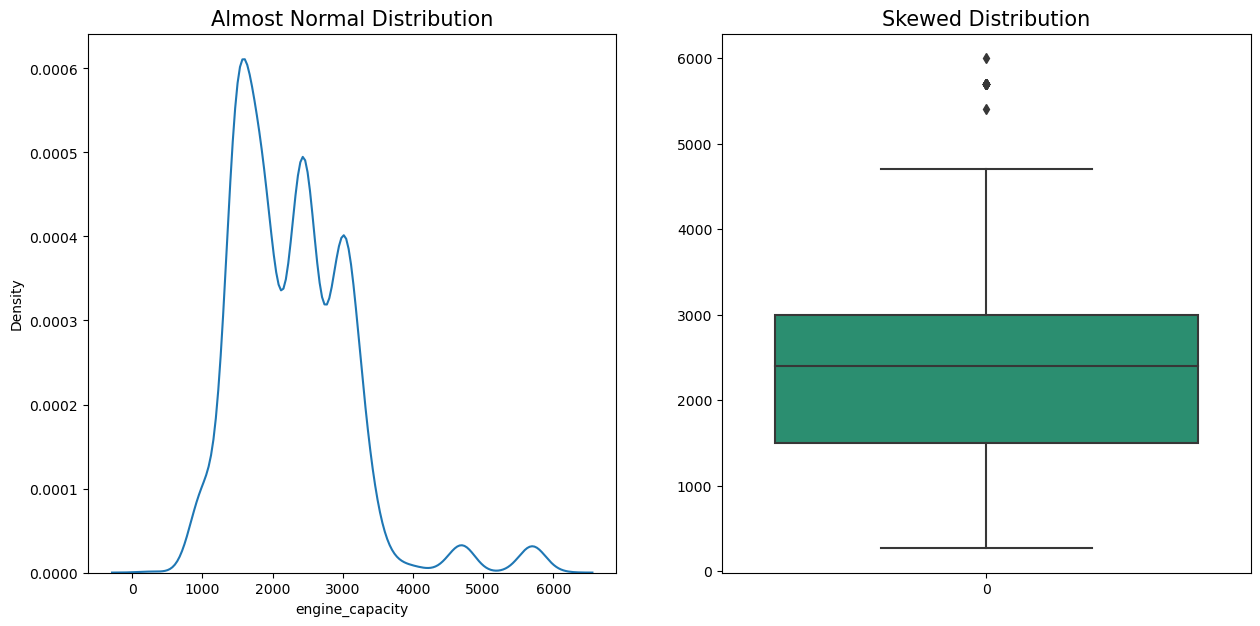

In [285]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Almost Normal Distribution", fontsize=15)
sns.kdeplot(data = df_eda["engine_capacity"])
plt.subplot(1,2,2)
plt.title("Skewed Distribution", fontsize=15)
sns.boxplot(data = df_eda["engine_capacity"], palette="Dark2")
plt.show()

In [286]:
norm_upper_limit = df_eda["engine_capacity"].mean() + 3 * df_eda["engine_capacity"].std()
norm_lower_limit = df_eda["engine_capacity"].mean() - 3 * df_eda["engine_capacity"].std()

In [287]:
norm_upper_limit

4776.706788132827

In [288]:
norm_lower_limit

-219.5628320888709

In [289]:
df_eda_new = df_eda[(df_eda["engine_capacity"] > norm_lower_limit) & (df_eda["engine_capacity"] < norm_upper_limit)]

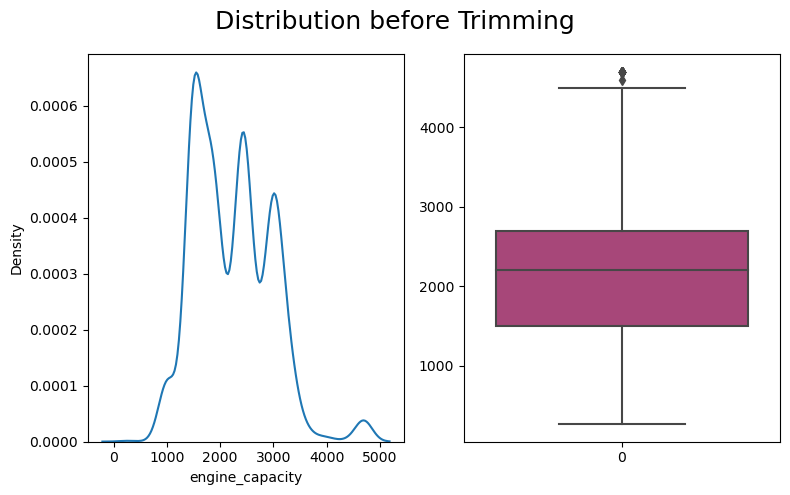

In [290]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_eda_new['engine_capacity'])
plt.subplot(1,2,2)
sns.boxplot(data = df_eda_new['engine_capacity'], palette="magma")
plt.tight_layout()
plt.show()

In [291]:
#Capping
q1 = df_eda["engine_capacity"].quantile(0.25)
q2 = df_eda["engine_capacity"].quantile(0.75)

In [292]:
IQR = q3 - q1

In [293]:
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

In [294]:
df_skew_new = pd.DataFrame(np.where(df_eda["engine_capacity"] > max_limit, max_limit, 
         (np.where(df_eda["engine_capacity"] < min_limit, min_limit, df_eda["engine_capacity"]))), columns=["engine_capacity"])

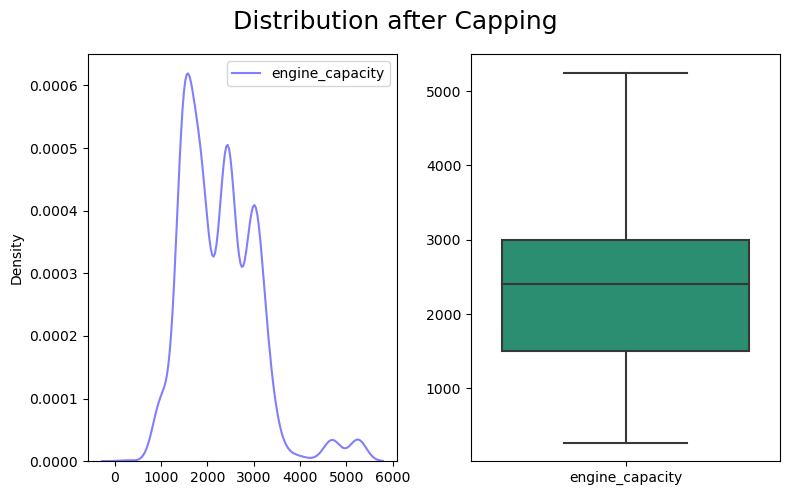

In [295]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_skew_new, palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df_skew_new, palette="Dark2")
plt.tight_layout()
plt.show()

In [296]:
df_eda.head()

,make,model,year_build,bodystyle,transmissions,exterior_color,engine_capacity,fuel_type,drive_types,vehicle_lifestyle,seats,price
0,Lexus,NX 200t F Sport,2017,SUV,Automatic,White,2000,Petrol,Front Wheel Drive,Family,5,55500
1,Toyota,Prius Option 4,2010,Hatchback,Automatic,Gold,1800,Petrol,Front Wheel Drive,Family,5,18500
2,Toyota,Highlander V6,2002,SUV,Automatic,Silver,3000,Petrol,Front Wheel Drive,Family,5,15300
3,Lexus,RX 300,2019,SUV,Automatic,Black,3200,Petrol,Front Wheel Drive,Family,5,78500
4,Toyota,Prius,2006,Sedan,Manual,Gold,2400,Petrol,Front Wheel Drive,Family,5,10800


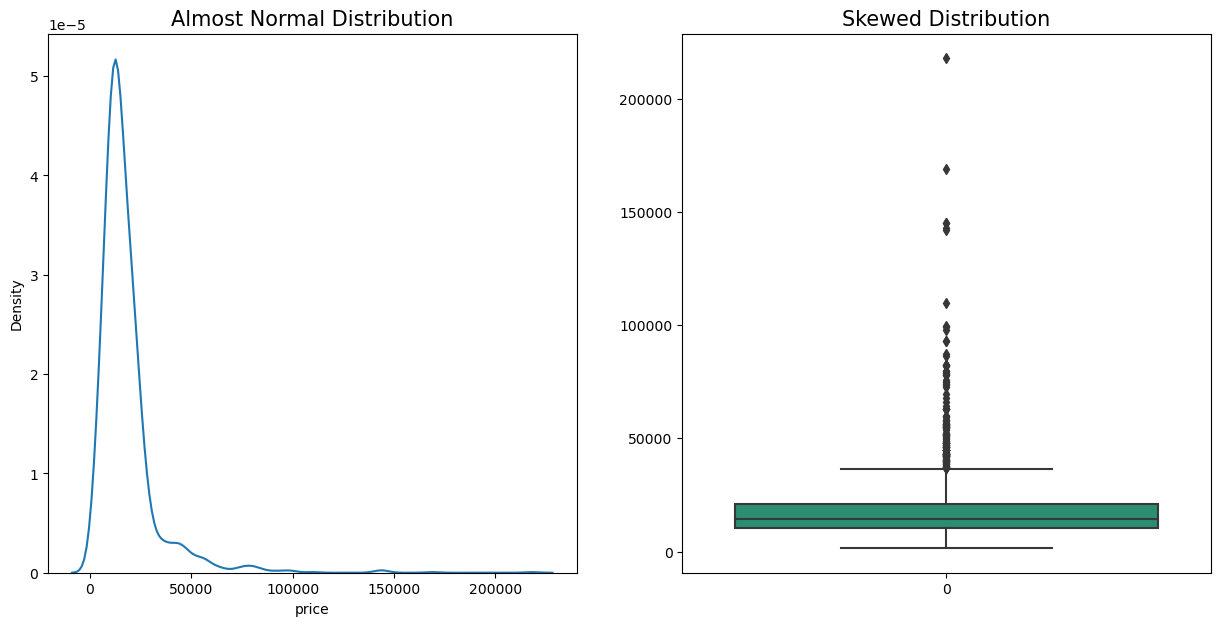

In [297]:
# Feature Price
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Almost Normal Distribution", fontsize=15)
sns.kdeplot(data = df_eda["price"])
plt.subplot(1,2,2)
plt.title("Skewed Distribution", fontsize=15)
sns.boxplot(data = df_eda["price"], palette="Dark2")
plt.show()

In [298]:
df_eda['price'].max()

218000

In [299]:
df_eda['price'].min()

1450

In [300]:
df_eda['price'].median()

14300.0

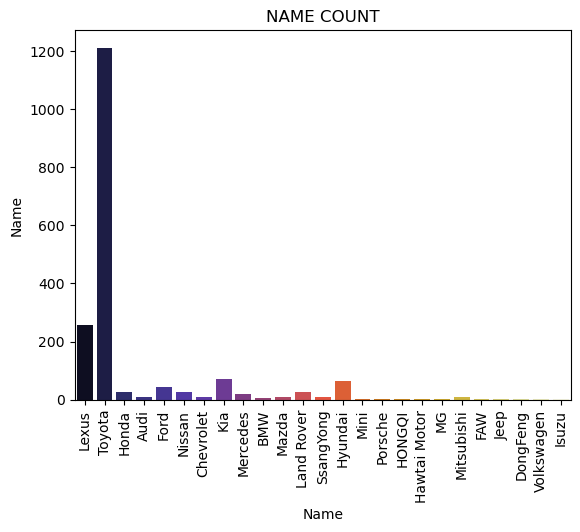

In [301]:
sns.countplot(data=df_eda,x="make",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Name",fontsize=10,color="black")
plt.ylabel("Name",fontsize=10,color="black")
plt.title("NAME COUNT",color="black")
plt.show()

In [302]:
df_toyota =df_eda[df_eda['make'] == 'Toyota']
df_toyota

,make,model,year_build,bodystyle,transmissions,exterior_color,engine_capacity,fuel_type,drive_types,vehicle_lifestyle,seats,price
1,Toyota,Prius Option 4,2010,Hatchback,Automatic,Gold,1800,Petrol,Front Wheel Drive,Family,5,18500
2,Toyota,Highlander V6,2002,SUV,Automatic,Silver,3000,Petrol,Front Wheel Drive,Family,5,15300
4,Toyota,Prius,2006,Sedan,Manual,Gold,2400,Petrol,Front Wheel Drive,Family,5,10800
5,Toyota,Prius,2006,Hatchback,Automatic,Red,1800,Petrol,Front Wheel Drive,Family,5,99000
6,Toyota,Prius Plug In Option 3,2012,Hatchback,Automatic,White,1800,Petrol,Front Wheel Drive,Family,5,22500
...,...,...,...,...,...,...,...,...,...,...,...,...
1815,Toyota,Prius,2004,Hatchback,Automatic,Black,1500,Petrol,Front Wheel Drive,Family,5,9200
1816,Toyota,Prius,2005,Hatchback,Automatic,Gold,1500,Petrol,Front Wheel Drive,Family,5,10400
1817,Toyota,Prius,2004,Hatchback,Automatic,White,1500,Petrol,Front Wheel Drive,Family,5,10900
1818,Toyota,Prius,2007,Hatchback,Automatic,White,1500,Petrol,Front Wheel Drive,Family,5,13900


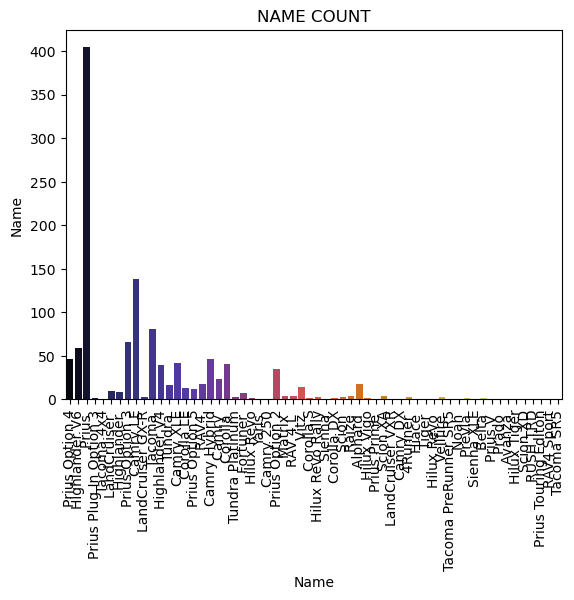

In [303]:
sns.countplot(data=df_toyota,x="model",palette="CMRmap")
#plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.xlabel("Name",fontsize=10,color="black") #,figsize=[15,10]
plt.ylabel("Name",fontsize=10,color="black")
plt.title("NAME COUNT",color="black")
#plt.figsize()
plt.show()

In [141]:
#plot_cat('transmissions')

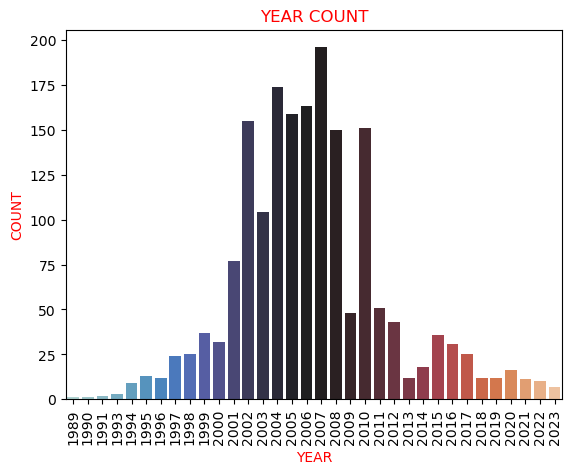

In [304]:
sns.countplot(data=df_eda,x="year_build",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=10,color="RED")
plt.ylabel("COUNT",fontsize=10,color="RED")
plt.title("YEAR COUNT",color="RED")
plt.show()

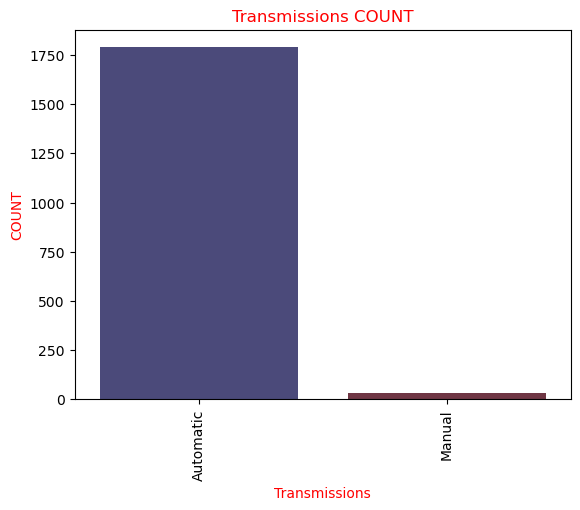

In [305]:
sns.countplot(data=df_eda,x="transmissions",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("Transmissions",fontsize=10,color="RED")
plt.ylabel("COUNT",fontsize=10,color="RED")
plt.title("Transmissions COUNT",color="RED")
plt.show()

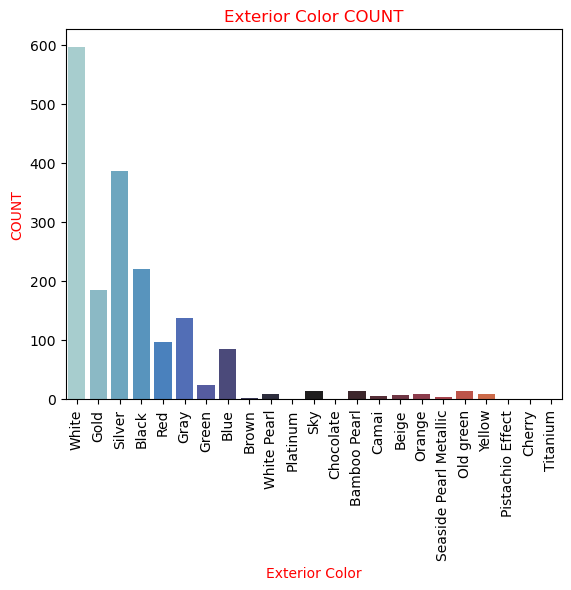

In [306]:
sns.countplot(data=df_eda,x="exterior_color",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("Exterior Color",fontsize=10,color="RED")
plt.ylabel("COUNT",fontsize=10,color="RED")
plt.title("Exterior Color COUNT",color="RED")
plt.show()

# <span style="font-family:Tw Cen MT Condensed (Headings);font-size:30px; color:orange"> sklearn: LinearRegression  </span>

In [100]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
cdf = df_eda[['year_build','engine_capacity','price']]

**We are going to plot two features 'year_build' and 'engine_capacity' to see their relationship with our dependent feature 'price'**

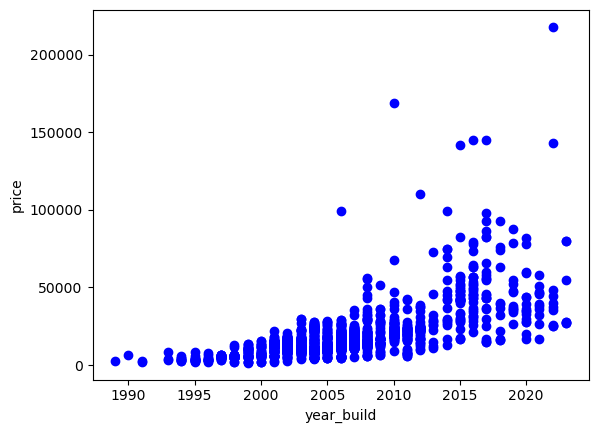

In [386]:
plt.scatter(df_eda.year_build, df_eda.price,  color='blue')
plt.xlabel("year_build")
plt.ylabel("price")
plt.show()

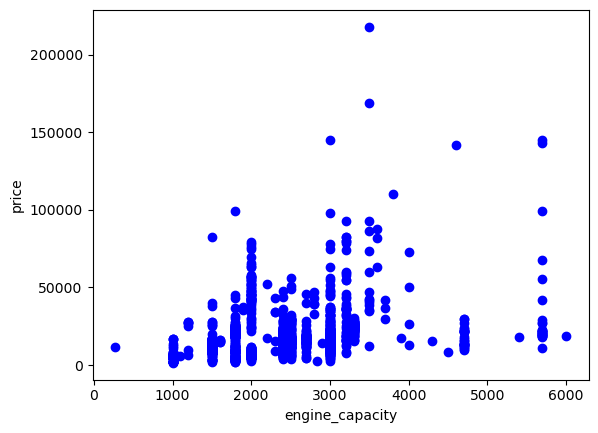

In [387]:
plt.scatter(df_eda.engine_capacity, df_eda.price,  color='blue')
plt.xlabel("engine_capacity")
plt.ylabel("price")
plt.show()

In [336]:
## Feature Important selection

[0.56861492 0.43138508]


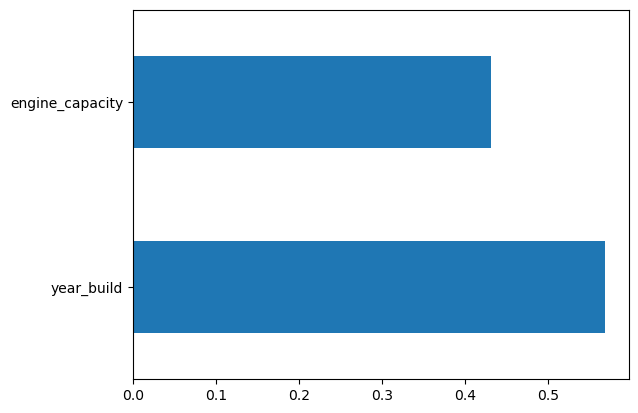

In [388]:
X = df_eda[['year_build','engine_capacity']]  #independent columns
y = df_eda[['price']]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(2).plot(kind='barh')
plt.show()

Let's build some model !!
First we are going to split data into train 80% and test 20%. 

In [343]:
cdf = df_eda[['year_build','engine_capacity','price']]
msk = np.random.rand(len(df_eda)) < 0.8
train = cdf[msk]
test = cdf[~msk]

**Single Linear Regression**<br>
feature "Year_build"

In [382]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['year_build']])
train_y = np.asanyarray(train[['price']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1938.01688388]]
Intercept:  [-3870195.40947605]


In [383]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['year_build']])
test_y = np.asanyarray(test[['price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 6553.44
Residual sum of squares (MSE): 101565246.00
R2-score: 0.44


feature engine_capacity

In [351]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['engine_capacity']])
train_y = np.asanyarray(train[['price']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[5.72351108]]
Intercept:  [4842.52337479]


In [352]:

test_x = np.asanyarray(test[['engine_capacity']])
test_y = np.asanyarray(test[['price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 8660.23
Residual sum of squares (MSE): 291861366.49
R2-score: 0.09


**Multi Linnear Regression Model** <br>
feature "year_build" & "engine_capacity"

In [355]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['year_build','engine_capacity']])
y = np.asanyarray(train[['price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[1871.92223678    6.13572668]]


In [356]:
y_hat= regr.predict(test[['year_build','engine_capacity']])
x = np.asanyarray(test[['year_build','engine_capacity']])
y = np.asanyarray(test[['price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 173410755.39
Variance score: 0.46


**One Hot Encoding** <br>
feature "fuel_type"

In [363]:
dummies = pd.get_dummies(df_eda['fuel_type'])

In [391]:
dummies.head()

,Diesel,Hybrid,LPG,Petrol,Petrol and LPG
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [367]:
dummies.columns

Index(['Diesel', 'Hybrid', 'LPG', 'Petrol', 'Petrol and LPG'], dtype='object')

In [368]:
merged = pd.concat([df_eda, dummies],axis=1)

In [369]:
price_columns = 'price'

In [370]:
features_columns = list(dummies.columns)
features_columns.append('year_build')
features_columns.append('engine_capacity')
features_columns

['Diesel',
 'Hybrid',
 'LPG',
 'Petrol',
 'Petrol and LPG',
 'year_build',
 'engine_capacity']

In [371]:
all_columns = list(dummies.columns)
all_columns.append('year_build')
all_columns.append('engine_capacity')
all_columns.append(price_columns)
all_columns

['Diesel',
 'Hybrid',
 'LPG',
 'Petrol',
 'Petrol and LPG',
 'year_build',
 'engine_capacity',
 'price']

In [372]:
cdf = merged[all_columns]
msk = np.random.rand(len(merged)) < 0.8
train = cdf[msk]
test = cdf[~msk]
cdf.head()

,Diesel,Hybrid,LPG,Petrol,Petrol and LPG,year_build,engine_capacity,price
0,0,0,0,1,0,2017,2000,55500
1,0,0,0,1,0,2010,1800,18500
2,0,0,0,1,0,2002,3000,15300
3,0,0,0,1,0,2019,3200,78500
4,0,0,0,1,0,2006,2400,10800


In [373]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[features_columns])
y = np.asanyarray(train[[price_columns]])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-2.84781251e+03  7.02365695e+03 -5.52625311e+03  8.35942821e+02
   5.14465845e+02  1.97070524e+03  6.75203661e+00]]


In [374]:
y_hat= regr.predict(test[features_columns])
x = np.asanyarray(test[features_columns])
y = np.asanyarray(test[[price_columns]])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 79524333.41
Variance score: 0.56
